In [53]:
# Libraries to import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import warnings
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC




In [3]:
# Dataset load
datafile = pd.read_csv("creditcard.csv")

In [4]:
df = datafile.copy()

In [5]:
# Datafile exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.head(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Study of the specific columns
df1=df.loc[:, ['Time', 'Amount','Class']]

In [9]:
df1

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0
...,...,...,...
284802,172786.0,0.77,0
284803,172787.0,24.79,0
284804,172788.0,67.88,0
284805,172788.0,10.00,0


### Exploratory Data Analysis

In [10]:
df1.describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [13]:
df1.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [15]:
# Thus we can see that it's an imbalanced dataset as the number od fraud in the target variable is very less.

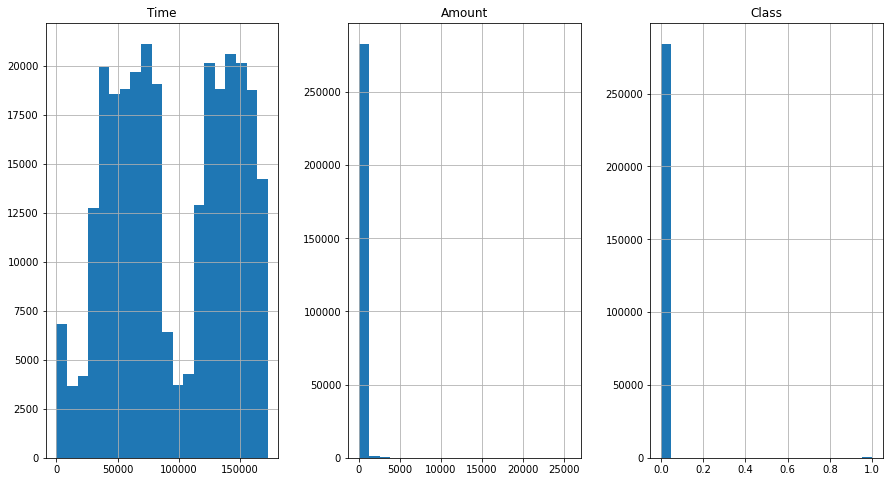

In [16]:
# Data Visualisation
df1.hist(bins=20, figsize=(15,8),layout=(1,3))
plt.show()

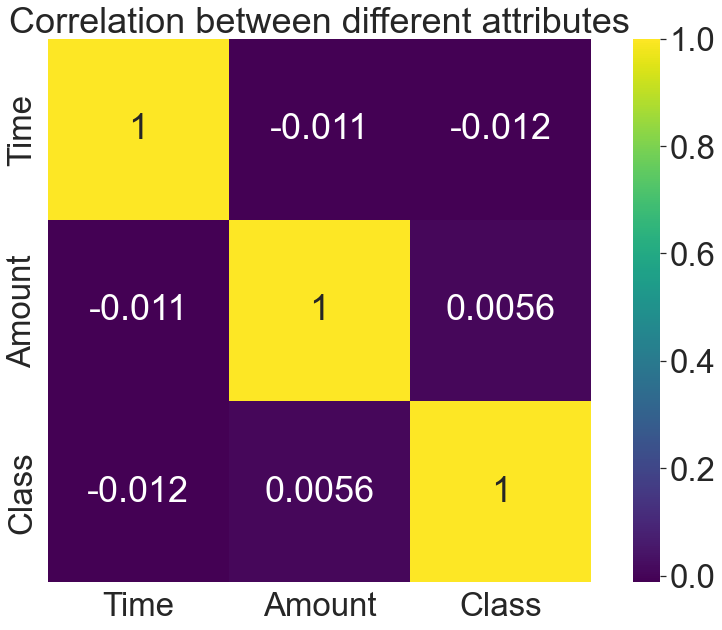

In [17]:
# Variable correlation
plt.figure(figsize=(15,10))
sns.set(font_scale=3)
sns.heatmap(df1.corr(), vmax=1, square=True, annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

In [18]:
# Thus the variables rae not strongly correlated with one another.

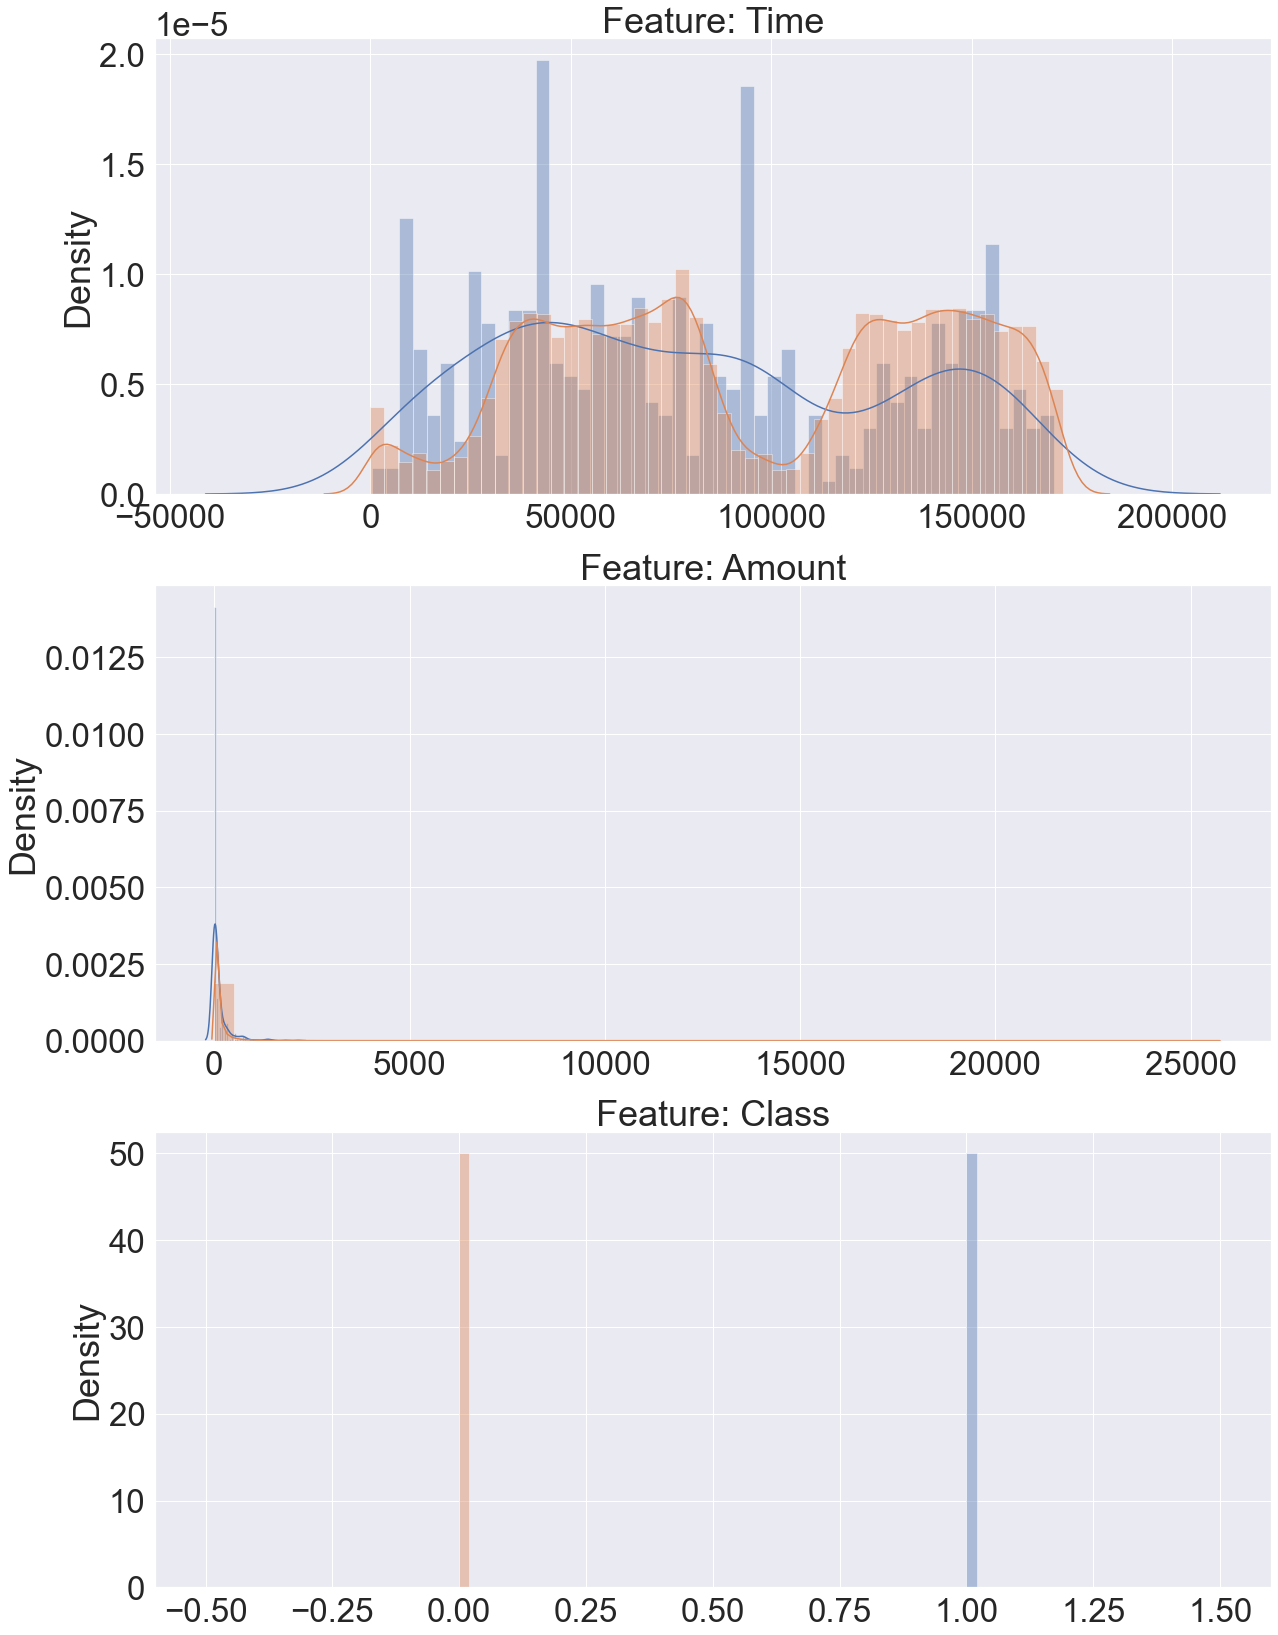

In [24]:
#Pairplot
plt.figure(figsize=(20,30*10))

features = df1.iloc[:,0:30].columns
gs = gridspec.GridSpec(30, 1)
for i, feature in enumerate(df1[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df1[feature][df1.Class == 1], bins=50)
    sns.distplot(df1[feature][df1.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('Feature: ' + str(feature))
plt.show()

warnings.filterwarnings('ignore')

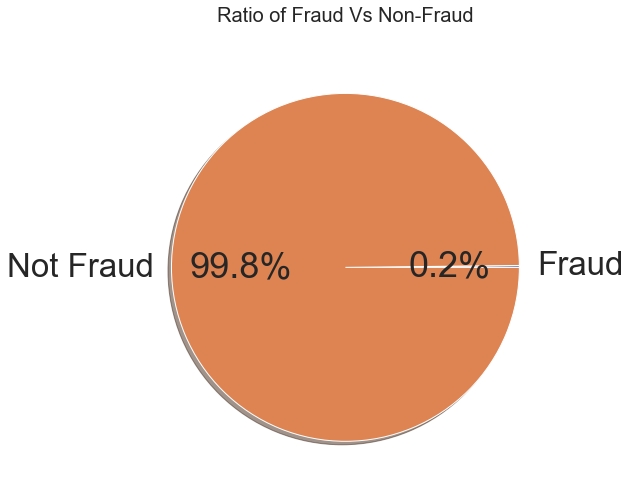

In [25]:
# Pie chart for the class variable distribution
fraud =len(df1[df1['Class']==1])
notfraud = len(df1[df1['Class']==0])

# Data to plot
labels = 'Fraud','Not Fraud'
sizes = [fraud,notfraud]

# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Ratio of Fraud Vs Non-Fraud\n', fontsize=20)
sns.set_context("paper", font_scale=2)

plt.show()

In [26]:
# Just 0.2% of the target variable are frauds.

### Model preparation

In [27]:
# Separation of the dependent and independent variables
x = df.drop('Class',axis=1)
y = df['Class']

In [29]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101) 

In [31]:
# concatenate our training data back together
x = pd.concat([x_train, y_train], axis=1)
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
172464,121109.0,2.066985,0.016580,-1.070827,0.392907,-0.029213,-1.156059,0.248210,-0.385196,0.401627,...,-0.282259,-0.632580,0.321022,0.001811,-0.258038,0.196543,-0.064627,-0.058485,1.98,0
214513,139704.0,-1.453558,0.081141,0.809398,-2.131145,-0.731087,0.882227,0.351189,0.424895,-1.353791,...,-0.196406,-0.707526,-0.351322,0.105077,0.394191,-0.486300,-0.172103,-0.176474,187.99,0
109813,71551.0,1.275871,0.205109,0.195565,0.307200,0.014262,-0.185997,-0.032868,-0.027179,-0.215606,...,-0.255718,-0.753018,0.017283,-0.491811,0.310541,0.127125,-0.031471,0.001275,1.79,0
197980,132262.0,2.214103,-1.753457,-0.179846,-1.552588,-1.775997,0.098527,-1.872410,0.129077,-0.462181,...,-0.162337,-0.021147,0.331324,0.427401,-0.516737,-0.263310,0.053084,-0.022631,39.00,0
46155,42660.0,1.133369,-0.214983,1.214193,0.815764,-0.904604,0.168575,-0.697895,0.210090,0.923639,...,-0.062364,0.044449,0.058641,0.123333,0.181403,0.345751,0.033015,0.024417,11.50,0


### UPSAMPLING

In [34]:
# Upsampling to balance the fraud and not fraud ratio
not_fraud = x[x.Class==0]
fraud = x[x.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True,
                          n_samples=len(not_fraud),
                          random_state=101)

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

0    213238
1    213238
Name: Class, dtype: int64

### LOGISTIC REGRESSION

In [36]:
y_train = upsampled.Class
x_train = upsampled.drop('Class', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(x_train, y_train)

upsampled_pred = upsampled.predict(x_test)

In [43]:
# Accuracy score
accuracy_score(y_test, upsampled_pred)

0.9744529648043594

In [42]:
# Confusion Matrix
pd.DataFrame(confusion_matrix(y_test, upsampled_pred))

,0,1
0,69271,1806
1,13,112


In [40]:
print('Logistic Regression classification_report')

print('...'*10)

print(classification_report(y_test,upsampled_pred))

Logistic Regression classification_report
..............................
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71077
           1       0.06      0.90      0.11       125

    accuracy                           0.97     71202
   macro avg       0.53      0.94      0.55     71202
weighted avg       1.00      0.97      0.99     71202



### DOWNSAMPLING

In [44]:
# Downsampling the datatset to reduce the values of the non-frauds
# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False,
                                n_samples = len(fraud),
                                random_state = 101) 
# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()

0    367
1    367
Name: Class, dtype: int64

In [45]:
y_train = downsampled.Class
x_train = downsampled.drop('Class', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(x_train, y_train)

undersampled_pred = undersampled.predict(x_test)

In [46]:
accuracy_score(y_test, undersampled_pred)

0.9642144883570686

In [48]:
# Classification report
pd.DataFrame(confusion_matrix(y_test, undersampled_pred))

,0,1
0,68540,2537
1,11,114


In [47]:
print('Logistic Regression classification_report on DownSampling')

print('...'*10)

print(classification_report(y_test,undersampled_pred))

Logistic Regression classification_report on DownSampling
..............................
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71077
           1       0.04      0.91      0.08       125

    accuracy                           0.96     71202
   macro avg       0.52      0.94      0.53     71202
weighted avg       1.00      0.96      0.98     71202



### Naive Bayes

In [56]:
gnb = GaussianNB()
gnb_best = gnb.fit(x_train, y_train)
gnb_pred = gnb_best.predict(x_test)
accuracy_score(y_test, gnb_pred)

0.9927108789078959

### Random Forest

In [57]:
randf = RandomForestClassifier(n_estimators=10).fit(x_train, y_train)
randf_pred = randf.predict(x_test)
accuracy_score(y_test, randf_pred)

0.9732170444650431

### Support Vector Classifier with Gridsearch CV

In [59]:
# Running 5 fold crossvalidation
C = [1]
gammas = [0.001, 0.1]
param_grid = dict(C=C, gamma=gammas)

svm = SVC(kernel='rbf', probability=True)
svm_grid = GridSearchCV(svm, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
svm_grid.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    7.6s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    7.7s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1], 'gamma': [0.001, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=10)

In [60]:
# predict on test set
grid_pred = svm_grid.predict(x_test)

In [61]:
accuracy_score(y_test, grid_pred)

0.9430493525462768

We will chose the Naive Bayes model as our final model as it has given a preiction accuracy of 99% on the test datatse.Thus this is the best model for this datatset and will be used for deployment.